In [50]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup 
import re

In [ ]:
#Source: https://www.kaggle.com/c/word2vec-nlp-tutorial#part-1-for-beginners-bag-of-words

In [1]:
datasetpath = "/Users/avkashchauhan/tools/datasets/kaggle-imdb-word2vec"

In [4]:
train = pd.read_csv(datasetpath + "/labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)

In [6]:
train.shape

(25000, 3)

In [7]:
train.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [13]:
print train["review"][0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [16]:
example1 = BeautifulSoup(train["review"][0], "html.parser")

In [19]:
example1.get_text()

u'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 

In [21]:
# Use regular expressions to do a find-and-replace
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      example1.get_text() )  # The text to search
print letters_only

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [22]:
lower_case = letters_only.lower() 

In [23]:
words = lower_case.split()

In [26]:
len(words)

437

In [29]:
# The following is necessary to get nltk setup
import nltk
# Download text data sets, including stop words
#nltk.download()

In [30]:
# Import the stop word list
from nltk.corpus import stopwords 
# Test if we do have stopwords
print stopwords.words("english") 

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [31]:
# Remove stop words from "words"
words = [w for w in words if not w in stopwords.words("english")]
print words

[u'stuff', u'going', u'moment', u'mj', u'started', u'listening', u'music', u'watching', u'odd', u'documentary', u'watched', u'wiz', u'watched', u'moonwalker', u'maybe', u'want', u'get', u'certain', u'insight', u'guy', u'thought', u'really', u'cool', u'eighties', u'maybe', u'make', u'mind', u'whether', u'guilty', u'innocent', u'moonwalker', u'part', u'biography', u'part', u'feature', u'film', u'remember', u'going', u'see', u'cinema', u'originally', u'released', u'subtle', u'messages', u'mj', u'feeling', u'towards', u'press', u'also', u'obvious', u'message', u'drugs', u'bad', u'kay', u'visually', u'impressive', u'course', u'michael', u'jackson', u'unless', u'remotely', u'like', u'mj', u'anyway', u'going', u'hate', u'find', u'boring', u'may', u'call', u'mj', u'egotist', u'consenting', u'making', u'movie', u'mj', u'fans', u'would', u'say', u'made', u'fans', u'true', u'really', u'nice', u'actual', u'feature', u'film', u'bit', u'finally', u'starts', u'minutes', u'excluding', u'smooth', u'cri

In [32]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

In [33]:
clean_review = review_to_words( train["review"][0] )
print clean_review

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [35]:
# Get the number of reviews based on the dataframe column size
num_reviews = train["review"].size
print(num_reviews)

25000


In [37]:
# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in xrange( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_train_reviews.append( review_to_words( train["review"][i] ) )
    if ( i%50 == 0):
        print "Processed... ", i
        

Processed...  0
Processed...  50
Processed...  100
Processed...  150
Processed...  200
Processed...  250
Processed...  300
Processed...  350
Processed...  400
Processed...  450
Processed...  500
Processed...  550
Processed...  600
Processed...  650
Processed...  700
Processed...  750
Processed...  800
Processed...  850
Processed...  900
Processed...  950
Processed...  1000
Processed...  1050
Processed...  1100
Processed...  1150
Processed...  1200
Processed...  1250
Processed...  1300
Processed...  1350
Processed...  1400
Processed...  1450
Processed...  1500
Processed...  1550
Processed...  1600
Processed...  1650
Processed...  1700
Processed...  1750
Processed...  1800
Processed...  1850
Processed...  1900
Processed...  1950
Processed...  2000
Processed...  2050
Processed...  2100
Processed...  2150
Processed...  2200
Processed...  2250
Processed...  2300
Processed...  2350
Processed...  2400
Processed...  2450
Processed...  2500
Processed...  2550
Processed...  2600
Processed...  26

In [38]:
print "Cleaning and parsing the training set movie reviews...\n"
clean_train_reviews = []
for i in xrange( 0, num_reviews ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print "Review %d of %d\n" % ( i+1, num_reviews )                                                                    
    clean_train_reviews.append( review_to_words( train["review"][i] ))

Cleaning and parsing the training set movie reviews...

Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



In [39]:
print "Creating the bag of words...\n"
from sklearn.feature_extraction.text import CountVectorizer

Creating the bag of words...



In [40]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 


In [41]:
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/sparse/compressed.py:130: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.indices) != 1 or np.rank(self.indptr) != 1:


In [42]:
# Numpy arrays are easy to work with, so convert the result to an  array
train_data_features = train_data_features.toarray()

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:


In [44]:
print train_data_features.shape

(25000, 5000)


Note that CountVectorizer comes with its own options to automatically do preprocessing, tokenization, and stop word removal -- for each of these, instead of specifying "None", we could have used a built-in method or specified our own function to use.  See the function documentation for more details. However, we wanted to write our own function for data cleaning in this tutorial to show you how it's done step by step.

In [48]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print len(vocab)

5000


In [49]:
print vocab

[u'abandoned', u'abc', u'abilities', u'ability', u'able', u'abraham', u'absence', u'absent', u'absolute', u'absolutely', u'absurd', u'abuse', u'abusive', u'abysmal', u'academy', u'accent', u'accents', u'accept', u'acceptable', u'accepted', u'access', u'accident', u'accidentally', u'accompanied', u'accomplished', u'according', u'account', u'accuracy', u'accurate', u'accused', u'achieve', u'achieved', u'achievement', u'acid', u'across', u'act', u'acted', u'acting', u'action', u'actions', u'activities', u'actor', u'actors', u'actress', u'actresses', u'acts', u'actual', u'actually', u'ad', u'adam', u'adams', u'adaptation', u'adaptations', u'adapted', u'add', u'added', u'adding', u'addition', u'adds', u'adequate', u'admire', u'admit', u'admittedly', u'adorable', u'adult', u'adults', u'advance', u'advanced', u'advantage', u'adventure', u'adventures', u'advertising', u'advice', u'advise', u'affair', u'affect', u'affected', u'afford', u'aforementioned', u'afraid', u'africa', u'african', u'afte

In [52]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

In [53]:
# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print count, tag

187 abandoned
125 abc
108 abilities
454 ability
1259 able
85 abraham
116 absence
83 absent
352 absolute
1485 absolutely
306 absurd
192 abuse
91 abusive
98 abysmal
297 academy
485 accent
203 accents
300 accept
130 acceptable
144 accepted
92 access
318 accident
200 accidentally
88 accompanied
124 accomplished
296 according
186 account
81 accuracy
284 accurate
123 accused
179 achieve
139 achieved
124 achievement
90 acid
971 across
1251 act
658 acted
6490 acting
3354 action
311 actions
83 activities
2389 actor
4486 actors
1219 actress
369 actresses
394 acts
793 actual
4237 actually
148 ad
302 adam
98 adams
453 adaptation
80 adaptations
154 adapted
810 add
439 added
166 adding
347 addition
337 adds
113 adequate
124 admire
621 admit
134 admittedly
101 adorable
510 adult
376 adults
100 advance
90 advanced
153 advantage
510 adventure
204 adventures
91 advertising
259 advice
90 advise
346 affair
93 affect
113 affected
104 afford
126 aforementioned
343 afraid
212 africa
255 african
187 afternoon

In [159]:
print "Training the random forest..."
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, train["sentiment"] )

Training the random forest...


In [164]:
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [186]:
# Read the test data

# Only 3 records
#testFile = "testData2.tsv"
# Only 2500 records
# testFile = "testData.tsv"
# Only 3 records with sentiment column for AUC
testFile = "valid.tsv"

test = pd.read_csv("/Users/avkashchauhan/tools/datasets/kaggle-imdb-word2vec/" + testFile, header=0, delimiter="\t", \
                   quoting=3 )

# Verify that there are 25,000 rows and 2 columns
print test.shape

(4, 3)


In [187]:
# Create an empty list and append the clean reviews one by one
num_reviews = len(test["review"])
print(num_reviews)
clean_test_reviews = [] 


4


In [188]:
print "Cleaning and parsing the test set movie reviews...\n"
for i in xrange(0,num_reviews):
    if( (i+1) % 1000 == 0 ):
        print "Review %d of %d\n" % (i+1, num_reviews)
    clean_review = review_to_words( test["review"][i] )
    clean_test_reviews.append( clean_review )


Cleaning and parsing the test set movie reviews...



In [189]:
print(len(clean_test_reviews))
clean_test_reviews

4


[u'naturally film main themes mortality nostalgia loss innocence perhaps surprising rated highly older viewers younger ones however craftsmanship completeness film anyone enjoy pace steady constant characters full engaging relationships interactions natural showing need floods tears show emotion screams show fear shouting show dispute violence show anger naturally joyce short story lends film ready made structure perfect polished diamond small changes huston makes inclusion poem fit neatly truly masterpiece tact subtlety overwhelming beauty',
 u'movie disaster within disaster film full great action scenes meaningful throw away sense reality let see word wise lava burns steam burns stand next lava diverting minor lava flow difficult let alone significant one scares think might actually believe saw movie even worse significant amount talent went making film mean acting actually good effects average hard believe somebody read scripts allowed talent wasted guess suggestion would movie star

In [190]:
# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()


In [191]:
test_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [192]:
# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)
print result

[1 0 1 1]


In [193]:
# Creating auc metrics for the validation
# Validation data must have "sentiment" column so AUC curve can be created using original sentiment and predicted sentiment.
from sklearn import metrics
train_predicted = forest.predict(test_data_features)
train_actual = test["sentiment"]
fpr, tpr, thresholds = metrics.roc_curve(train_actual, train_predicted, pos_label=1)
metrics.auc(fpr, tpr)

0.75

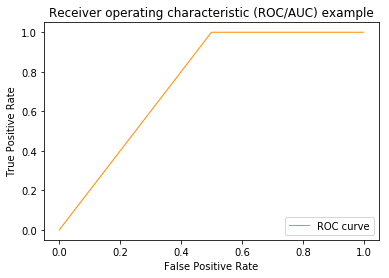

In [203]:
# Plotting AUC
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
lw = 1
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC/AUC) example')
plt.legend(loc="lower right")
plt.show()

In [175]:
print result

[1 0 1]


In [176]:
# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
#output = pd.DataFrame( data={"id":test["id"], "sentiment":result}, "review":test["review"] )

# Output with 
output = pd.DataFrame( data={"id":test["id"], "sentiment":result, "review":test["review"]} )


In [99]:
output

,id,review,sentiment
0,"""12311_10""","""Naturally in a film who's main themes are of ...",1
1,"""8348_2""","""This movie is a disaster within a disaster fi...",0
2,"""5828_4""","""All in all, this is a movie for kids. We saw ...",1


In [135]:
def vectorize_and_predict( all_reviews ):
    # Get a bag of words for the test set, and convert to a numpy array
    eval_data_features = vectorizer.transform(all_reviews)
    eval_data_features = eval_data_features.toarray()
    # Use the random forest to make sentiment label predictions
    result = forest.predict(eval_data_features)
    return result

In [150]:
myreview = ["I went to watch this movie with the feeling to see something good to pass my time. This movie exceeded my expectation"]

In [156]:
#myreview = ["This movie is a disaster within a disaster. What a waste of time to just visit to watch this movie. I hated it. Its disaster to watch this movie"]
# myreview = ["What a waste of time to just visit to watch this movie. I hated it. Its disaster to watch this movie"]
#myreview= ["What a waste of time to just visit to watch this movie"]
myreview= ["I hated it"]

In [144]:
print(myreview)
len(myreview)

['What a waste of time to just visit to watch this movie']


1

In [157]:
result = vectorize_and_predict(myreview)
print (result)

[1]
